In [10]:
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df 


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [11]:




dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [12]:
X = dataset[:,0:10]
Y = dataset[:,10]

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [14]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7175 - accuracy: 0.4990 - val_loss: 0.7130 - val_accuracy: 0.4566
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7038 - accuracy: 0.4961 - val_loss: 0.6983 - val_accuracy: 0.4658
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5127 - val_loss: 0.6884 - val_accuracy: 0.6164
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.6184 - val_loss: 0.6805 - val_accuracy: 0.7032
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6879 - val_loss: 0.6740 - val_accuracy: 0.6986
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6771 - accuracy: 0.6272 - val_loss: 0.6685 - val_accuracy: 0.6712
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6135 - val_loss: 0.6636 - val_accuracy: 0.6758
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8728 - val_loss: 0.3037 - val_accuracy: 0.8858
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8757 - val_loss: 0.3013 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3211 - accuracy: 0.8767 - val_loss: 0.2991 - val_accuracy: 0.8858
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8708 - val_loss: 0.2969 - val_accuracy: 0.8858
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8728 - val_loss: 0.2951 - val_accuracy: 0.8858
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8748 - val_loss: 0.2936 - val_accuracy: 0.8904
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8767 - val_loss: 0.2919 - val_accuracy: 0.8904
Epoch 

In [15]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8630


0.8630136847496033

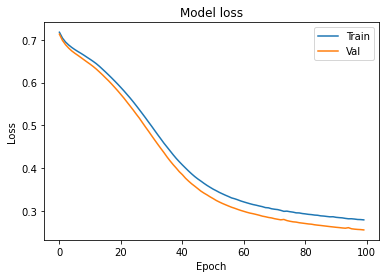

In [17]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()




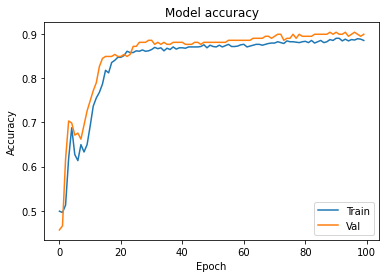

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [21]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))



Epoch 1/100
32/32 [==============================] - 1s 25ms/step - loss: 0.4488 - accuracy: 0.7769 - val_loss: 0.3550 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 1s 21ms/step - loss: 0.3239 - accuracy: 0.8552 - val_loss: 0.2710 - val_accuracy: 0.8995
Epoch 3/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2949 - accuracy: 0.8875 - val_loss: 0.2725 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 1s 25ms/step - loss: 0.2769 - accuracy: 0.8826 - val_loss: 0.2478 - val_accuracy: 0.9041
Epoch 5/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2705 - accuracy: 0.8953 - val_loss: 0.2274 - val_accuracy: 0.9087
Epoch 6/100
32/32 [==============================] - 1s 23ms/step - loss: 0.2678 - accuracy: 0.8885 - val_loss: 0.2576 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2720 - accuracy: 0.8894 - val_loss: 0.2321 - val_accuracy: 0.8950
Epoch 

32/32 [==============================] - 1s 21ms/step - loss: 0.1479 - accuracy: 0.9384 - val_loss: 0.1824 - val_accuracy: 0.9224
Epoch 59/100
32/32 [==============================] - 1s 19ms/step - loss: 0.1573 - accuracy: 0.9325 - val_loss: 0.2044 - val_accuracy: 0.9361
Epoch 60/100
32/32 [==============================] - 1s 25ms/step - loss: 0.1448 - accuracy: 0.9354 - val_loss: 0.2020 - val_accuracy: 0.9269
Epoch 61/100
32/32 [==============================] - 1s 24ms/step - loss: 0.1349 - accuracy: 0.9374 - val_loss: 0.2276 - val_accuracy: 0.9224
Epoch 62/100
32/32 [==============================] - 1s 21ms/step - loss: 0.1327 - accuracy: 0.9432 - val_loss: 0.2843 - val_accuracy: 0.9178
Epoch 63/100
32/32 [==============================] - 1s 21ms/step - loss: 0.1474 - accuracy: 0.9442 - val_loss: 0.2194 - val_accuracy: 0.9315
Epoch 64/100
32/32 [==============================] - 1s 21ms/step - loss: 0.1438 - accuracy: 0.9354 - val_loss: 0.3213 - val_accuracy: 0.9087
Epoch 65/100

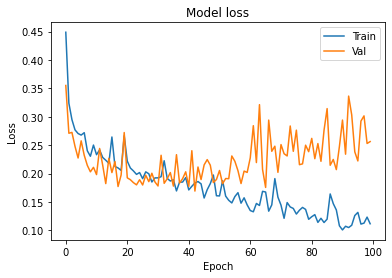

In [22]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


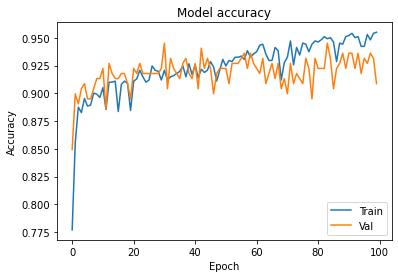

In [23]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [24]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 2s 37ms/step - loss: 14.2437 - accuracy: 0.6027 - val_loss: 3.8759 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 1s 33ms/step - loss: 1.6953 - accuracy: 0.8141 - val_loss: 0.6327 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.5687 - accuracy: 0.8630 - val_loss: 0.5345 - val_accuracy: 0.8402
Epoch 4/100
32/32 [==============================] - 1s 32ms/step - loss: 0.5208 - accuracy: 0.8581 - val_loss: 0.4519 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 1s 31ms/step - loss: 0.5114 - accuracy: 0.8601 - val_loss: 0.4647 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 31ms/step - loss: 0.4960 - accuracy: 0.8552 - val_loss: 0.4487 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 0.4808 - accuracy: 0.8689 - val_loss: 0.4301 - val_accuracy: 0.8995
Epoch

32/32 [==============================] - 1s 30ms/step - loss: 0.4474 - accuracy: 0.8748 - val_loss: 0.4073 - val_accuracy: 0.8904
Epoch 59/100
32/32 [==============================] - 1s 33ms/step - loss: 0.4429 - accuracy: 0.8875 - val_loss: 0.4014 - val_accuracy: 0.9041
Epoch 60/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4344 - accuracy: 0.8924 - val_loss: 0.4194 - val_accuracy: 0.8950
Epoch 61/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4502 - accuracy: 0.8757 - val_loss: 0.4016 - val_accuracy: 0.9041
Epoch 62/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4412 - accuracy: 0.8875 - val_loss: 0.4032 - val_accuracy: 0.9041
Epoch 63/100
32/32 [==============================] - 1s 33ms/step - loss: 0.4473 - accuracy: 0.8757 - val_loss: 0.3947 - val_accuracy: 0.8995
Epoch 64/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4290 - accuracy: 0.8836 - val_loss: 0.3921 - val_accuracy: 0.8995
Epoch 65/100

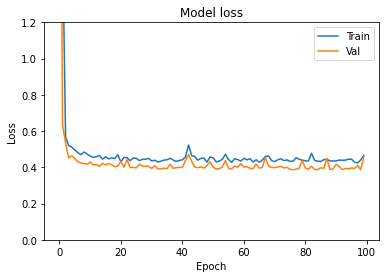

In [30]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()


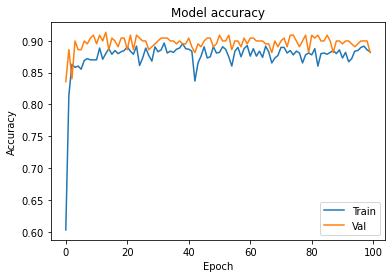

In [28]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


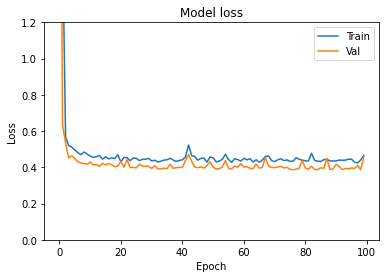